## Import the modules and load the data

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import numpy as np
import random

In [9]:
data_dir ='Data\\train'

In [10]:
def create_data(data_dir):
    images=[]
    labels=[]
    label_map={}
    for class_name in os.listdir(data_dir):
        class_dir=os.path.join(data_dir,class_name)
        
        if os.path.isdir(class_dir):
            label_map[class_name] = len(label_map)
            
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir,image)
            img = cv2.imread(image_path)
            
            if img is not None:
                img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                img = np.array(img)
                img = cv2.resize(img, (224, 224))  # Resize image
                img = img.reshape((224,224,1))
                images.append(img)
                labels.append(label_map[class_name])
    
    data = np.array(images)
    labels = np.array(labels)
    print(label_map)
    return data, labels

In [11]:
train_path = 'D:\My Laptop\Me\Programming\Machine Learning\Projects\Deep learning\Project\Data\\train'
val_path = 'D:\My Laptop\Me\Programming\Machine Learning\Projects\Deep learning\Project\Data\\val'
test_path = 'D:\My Laptop\Me\Programming\Machine Learning\Projects\Deep learning\Project\Data\\test'


train_data, train_labels = create_data(train_path)
val_data, val_labels = create_data(val_path)
test_data, test_labels = create_data(test_path)

{'fractured': 0, 'not fractured': 1}
{'fractured': 0, 'not fractured': 1}
{'fractured': 0, 'not fractured': 1}


In [12]:
train_data.shape


(9243, 224, 224, 1)

In [13]:
train_labels.shape

(9243,)

In [14]:
test_data.shape

(506, 224, 224, 1)

In [15]:
val_data.shape

(824, 224, 224, 1)

In [16]:
assert len(train_data) == len(train_labels), "Number of images and labels must match"

# Shuffle indices
indices = np.arange(len(train_data))
np.random.shuffle(indices)

# Shuffle images and labels using shuffled indices
train_data = train_data[indices]
train_labels = train_labels[indices]
print("Shape of shuffled images:", train_data.shape)
print("Shape of shuffled labels:", train_labels.shape)

Shape of shuffled images: (9243, 224, 224, 1)
Shape of shuffled labels: (9243,)


In [17]:
assert len(val_data) == len(val_labels), "Number of images and labels must match"

# Shuffle indices
indices = np.arange(len(val_data))
np.random.shuffle(indices)

# Shuffle images and labels using shuffled indices
val_data = val_data[indices]
val_labels = val_labels[indices]
print("Shape of shuffled images:", val_data.shape)
print("Shape of shuffled labels:", val_labels.shape)

Shape of shuffled images: (824, 224, 224, 1)
Shape of shuffled labels: (824,)


In [18]:
assert len(test_data) == len(test_labels), "Number of images and labels must match"

# Shuffle indices
indices = np.arange(len(test_data))
np.random.shuffle(indices)

# Shuffle images and labels using shuffled indices
test_data = test_data[indices]
test_labels = test_labels[indices]
print("Shape of shuffled images:", test_data.shape)
print("Shape of shuffled labels:", test_labels.shape)

Shape of shuffled images: (506, 224, 224, 1)
Shape of shuffled labels: (506,)


### Data Processing

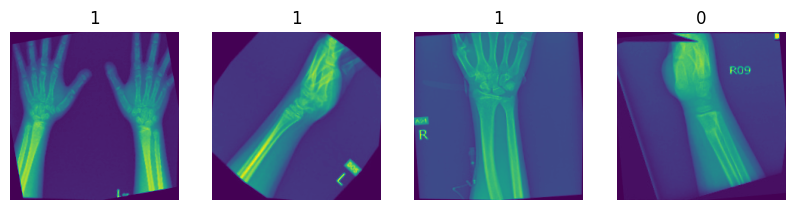

In [19]:
ran_num = random.randint(4,9243)
fig , axes = plt.subplots(ncols=4,figsize=(10,10))
showed = []
i = 0  # Initialize subplot index
num = ran_num - 4
while i < 4 and num< ran_num:
    axes[i].imshow(train_data[num])
    axes[i].set_title(train_labels[num])
    axes[i].axis('off')
    showed.append(train_labels[num])
    i+=1
    num+=1
plt.show()

In [20]:
train_data[ran_num].shape

(224, 224, 1)

In [21]:
train_data.shape

(9243, 224, 224, 1)

In [22]:
import scipy.ndimage as ndi
hist = ndi.histogram(train_data[ran_num],min=0,max=255,bins=256)
hist.shape

(256,)

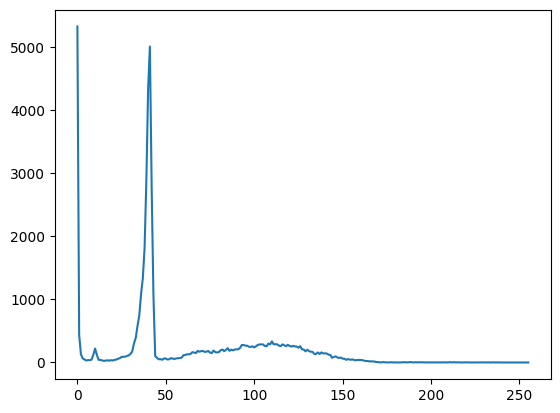

In [23]:
plt.plot(hist)
plt.show()

In [24]:
train_data[ran_num].size

50176

In [25]:
train_data

array([[[[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        ...,

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]]],


       [[[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [

## Train the model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Flatten, Dropout

In [59]:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(224, 224,1)))  # Adjust input shape
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 111, 111, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        10,817 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,201 (223.44 KB)

 Trainable params: 57,201 (223.44 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.keras',monitor = 'val_loss',save_best_only = True)

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss',patience = 2)

In [63]:
history = model.fit(train_data,train_labels,epochs=10,validation_split=0.2,validation_data=(val_data,val_labels),callbacks=[checkpoint, early_stopping])

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 116s 394ms/step - accuracy: 0.5798 - loss: 2.6128 - val_accuracy: 0.7027 - val_loss: 0.6039
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 114s 393ms/step - accuracy: 0.7757 - loss: 0.4717 - val_accuracy: 0.7403 - val_loss: 0.5261
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 115s 398ms/step - accuracy: 0.8257 - loss: 0.3879 - val_accuracy: 0.8398 - val_loss: 0.3850
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 113s 392ms/step - accuracy: 0.9134 - loss: 0.2231 - val_accuracy: 0.9029 - val_loss: 0.2751
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 115s 399ms/step - accuracy: 0.9425 - loss: 0.1556 - val_accuracy: 0.9053 - val_loss: 0.2460
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 114s 393ms/step - accuracy: 0.9528 - loss: 0.1342 - val_accuracy: 0.9296 - val_loss: 0.2133
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 113s 392ms/step - accuracy: 0.9673 - loss: 0.0992 - val_accuracy: 0.9284 - val_loss: 0.2008
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 114s 395ms/step - accuracy: 0.9706 -

In [64]:
model.load_weights('weights.keras')

In [65]:
model.evaluate(val_data,val_labels)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9300 - loss: 0.2235


[0.1806279569864273, 0.946601927280426]

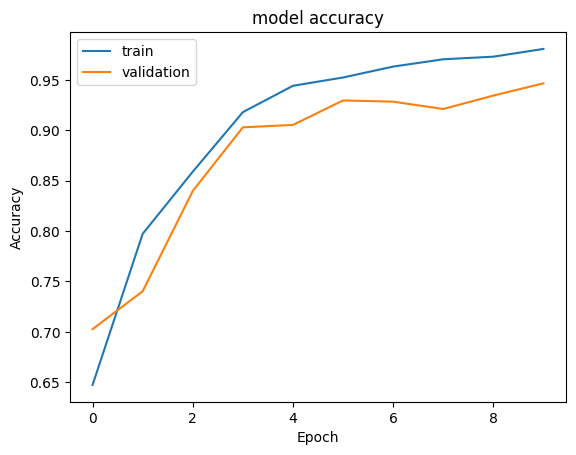

In [66]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
train_predict= model.predict(train_data)
print(f'train accuracy = {accuracy_score(train_labels,np.round(train_predict)):0.2f}')

289/289 ━━━━━━━━━━━━━━━━━━━━ 31s 106ms/step
train accuracy = 0.98


In [69]:
val_predict= model.predict(val_data)
print(f'val accuracy = {accuracy_score(val_labels,np.round(val_predict)):0.2f}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
val accuracy = 0.95


In [70]:
test_predict= model.predict(test_data)
print(f'test accuracy = {accuracy_score(test_labels,np.round(test_predict)):0.2f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
test accuracy = 0.97


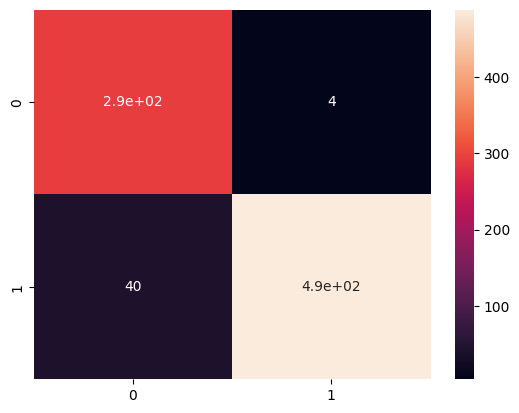

In [71]:
from seaborn import heatmap

heatmap(confusion_matrix(np.round(val_predict),val_labels),annot=True)
plt.show()

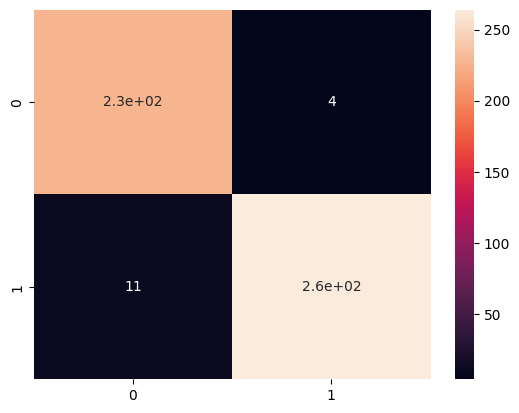

In [72]:
heatmap(confusion_matrix(np.round(test_predict),test_labels),annot=True)
plt.show()

## Let's explore our model

In [93]:
conv1 = model.layers[0]
weights = conv1.get_weights()
len(weights)

2

In [94]:
kernel1 = weights[0]
kernel1.shape

(3, 3, 1, 16)

In [95]:
kernel1_1 = kernel1[:,:,0,2]
kernel1_1.shape

(3, 3)

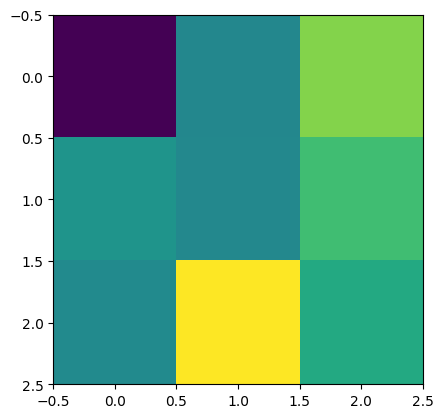

In [96]:
plt.imshow(kernel1_1)
plt.show()

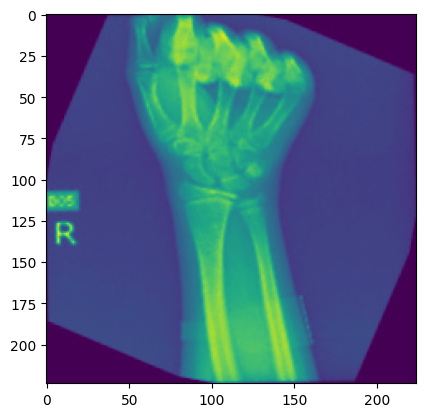

In [97]:
test_image = test_data[random.randint(0,len(test_data)-1),:,:,0]
plt.imshow(test_image)
plt.show()

In [98]:
def convolution(image, kernel):
    # Get dimensions of image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Define output array
    output = np.zeros_like(image)

    # Pad the image to handle boundary effects
    padded_image = np.pad(image, ((kernel_height//2, kernel_height//2), (kernel_width//2, kernel_width//2)), mode='constant')

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)

    return output


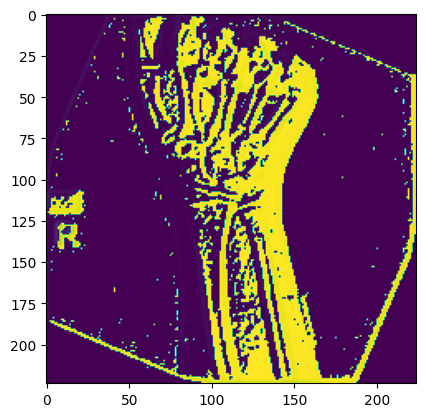

In [99]:
filtered_image = convolution(test_image,kernel1_1)
plt.imshow(filtered_image)
plt.show()

### Let's discover what another kernel do

In [110]:
kernel1_3 =kernel1[:,:,0,3]
kernel1_3.shape

(3, 3)

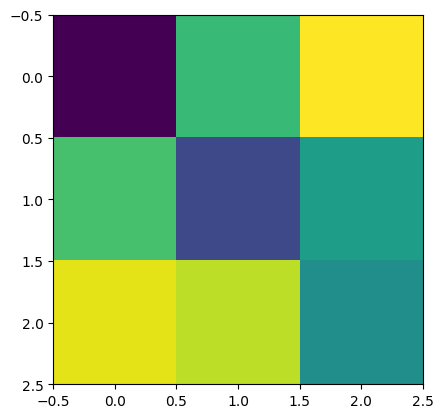

In [111]:
plt.imshow(kernel1_3)
plt.show()

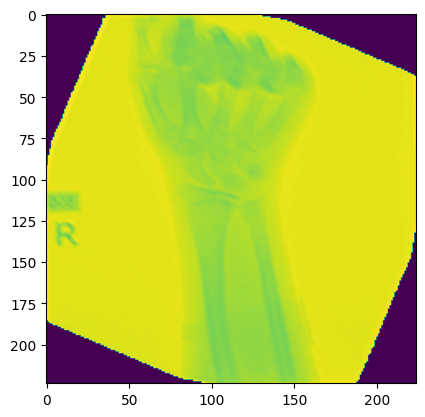

In [112]:
filtered_image2 = convolution(test_image,kernel1_3)
plt.imshow(filtered_image2)
plt.show()

## It's time to save the model

In [113]:
import joblib

joblib.dump(model,'model.pkl')

['model.pkl']